In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import sympy as sp
import scipy as sc
from sympy.vector import CoordSys3D, gradient, curl, divergence

# <center> Vector Calculus using Sympy
Vector calculus plays an important role in Physics, particularly in understanding Maxwell's equations which require a sound knowledge of vector calculus. In this context, the Python library Sympy will be demonstrated, which can be used to analytically solve integrals, curl, and divergence of vector fields. This worksheet will particularly showcase the use of Green's theorem to calculate the line integral for different vector fields.

## Line Integral
Suppose a 2D vector field, $\vec{F}$, of the form
$$\vec{F} = P(x, y)\hat{i} + Q(x, y)\hat{j}$$

We want to compute the line integral along a given (2D) curve/path *C*,

$$ Line~integral = \int_c{\vec{F}. \vec{dS}}$$ 

$$Line~integral = \int_c{P(x, y)dx} + \int_c{Q(x, y)}dy$$

Usually, it is convenient to solve the problem into its parametric form, therefore above integral will take the form

$$ \int_c{({P'(t) \frac{dx}{dt}} + {Q'(t) \frac{dy}{dt}})}dt$$

In the following example line integral for different paths has computed, and checked if the field is conservative or not.

#### Example 1
Suppose a Force vector given by
$$\vec{F} = -y \hat{i} + x \hat{j}$$

Find the line integral (*work in Physics*) along the following three different paths \
C1 : Straight line, $y = x$ \
C2: Parabola,       $y = x^2$ \
C3: The curve,      $y = \sqrt[3]{x}$ 

*Solution* -It is easy to solve integration wrt to only variable say *t*, rather solving integration both wrt to *dx* and *dy* therefore the pararmetric form would be

C1: $x = t, y = t$ where $dx =dt, dy = dt$ \
C2: $x = t, y = t^2$ where $dx = dt, dy = 2tdt$\
C3: $x = t, y = t^{1/3}$ where $dx = dt, dy = \frac{t^{-2/3}}{3}$

The limits would be same in all cases i.e., $0\le t \ge 1$.

In [2]:
x, y, z, t = sp.symbols('x, y, z,  t', real = True)  # declaration of variables in Sympy
r = sp.symbols('r', real = True)
C = CoordSys3D('')

In [3]:
F = -C.y*C.i + C.x*C.j    # Given field
F

(-.y)*.i + .x*.j

In [4]:
C1 = sp.Integral(-t + t, (t, 0, 1))  # Computing line integral along curve C1
C1

Integral(0, (t, 0, 1))

In [5]:
C1 = sp.Integral(-t, (t, 0, 1)).doit() + sp.Integral(t, (t, 0, 1)).doit()
C1

0

In [6]:
C2 = sp.Integral(t**2, (t, 0, 1))    # Computing line integral along curve C2
C2

Integral(t**2, (t, 0, 1))

In [7]:
C2 = sp.Integral(t**2, (t, 0, 1)).doit()
C2

1/3

In [8]:
C3 = sp.Integral(-t**(1/3) + t/3*t**(-2/3), (t, 0, 1))   # # Computing line integral along curve C3
C3

Integral(-t**0.333333333333333 + t**0.333333333333333/3, (t, 0, 1))

In [9]:
C3 = sp.Integral(-t**(1/3) + t/3*t**(-2/3), (t, 0, 1)).doit()
C3

-0.500000000000000

It shows that field is not conservative as the line integral is different for different paths. It can directly be checked with help of Sympy method (*is_conservative*) i.e.,

In [10]:
from sympy.vector import is_conservative
is_conservative(F)

False

#### Graphical presentation

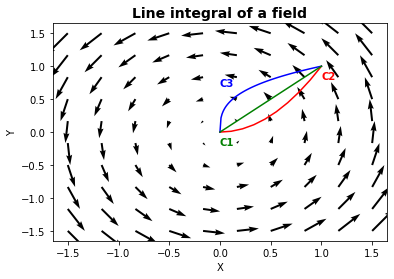

In [13]:
s = np.linspace(-1.5, 1.5, 10)
x1, y1 = np.meshgrid(s, s)
fig, ax = plt.subplots()
ax.quiver(x1, y1, -y1, x1)
ax.plot(np.linspace(0, 1, 10), (np.linspace(0, 1, 10))**2, 'red')
ax.plot(np.linspace(0, 1, 100), (np.linspace(0, 1, 100))**(1/3), 'blue')
ax.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), 'green')
ax.text(1, 0.8, 'C2', fontweight = 'bold', color = 'red')
ax.text(0, 0.7, 'C3', fontweight = 'bold', color = 'blue')
ax.text(0, -0.2, 'C1', fontweight = 'bold', color = 'green')
ax.set_title('Line integral of a field', fontsize = 14, fontweight = 'bold')
ax.set_xlabel('X');ax.set_ylabel('Y');plt.show()

Above figure shows that for curve C1 the angle is mostly $\pi/2$ between tangent of curve and field vectors giving value of line integral zero. For curve C2 both tangent and field are in same direction therefore returning a positive value of integration whereas for C3 the line integral is negative as tangent and field vectors are opposite in direction.  

### 1. Green's Theorem
Green's theorem is a powerful too to calculate line integral for a closed surface in 2D fields. Green's theorem defines the relation between line integral and surface integral. Consider a vector field $\vec{F} = P\hat{i} + Q\hat{j}$ on a region $D$ with smooth piecewise boundry, theorem states that

$$\oint_{\partial{D}} \vec{F}.\vec{T}ds = \int_D \int CurlFda$$

$$ \oint_{\partial{D}} \vec{F}.\vec{N}ds = \int_D \int Div FaA$$

where $\vec{T}$ and $\vec{N}$ are tangent and normal vectors of the given curve. The advantage of using Green surface integral is that we don't need to choose a path but simply to integrate the function twice wrt dx and dy over the infitesimal element of given area i.e., $da$. The integration operation can be performed in any order but it should be followed in such a way that unknown variables are solved at last.  

### 1.1 Curl and Divergence of a Field 
To apply Green's theorem it requires us to compute *Curl* and *Divergence* of a field. Suppose a vector field $V$, then the Curl and Diverence are given as follows

$$\vec{V}(x,y) = w(-y \hat{i} + x\hat{j})$$


$$CurlF = \vec{\nabla} \times \vec{F} $$
$$DivF = \vec{\nabla}.\vec{F} $$
The *Curl* of a field shows the curl/twist produced by the field on a surface, whereas diverence indicates sum of field flux entering and leaving through a surface.*diverence* is a scalar quantity and *curl* is also treated as a scalar quantity in two dimensional fields.

In [14]:
w = sp.symbols('w')
V = w*(-C.y*C.i + C.x*C.j)
V

(-.y*w)*.i + .x*w*.j

In [15]:
divergence(V)

0

In [16]:
curl(V)

2*w*.k

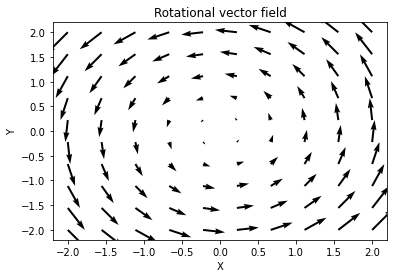

In [17]:
s = np.linspace(-2, 2, 10)
x1, y1 = np.meshgrid(s, s)
fig, ax = plt.subplots()
ax.quiver(x1, y1, -y1, x1)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_title('Rotational vector field')
plt.show()

### Example 2
Find the line integral of the following vector field
$$\vec{F} = xy\hat{i} - xy\hat{j}$$
For square surface:  $$0\le x \ge 1$$
 $$0\le y \ge 1$$

In [18]:
F = C.x*C.y*C.i - C.x*C.y*C.j
F

.x*.y*.i + (-.x*.y)*.j

In [19]:
div_F = divergence(F)
div_F

-.x + .y

In [20]:
curl_F = curl(F)
curl_F

(-.x - .y)*.k

In [21]:
curl_lin_int = sp.Integral(sp.Integral(-x -y, (x, 0, 1)), (y, 0, 1) )
curl_lin_int

Integral(-x - y, (x, 0, 1), (y, 0, 1))

In [22]:
curl_lin_int.doit()

-1

In [23]:
div_lin_int = sp.Integral(sp.Integral(-x + y, (x, 0, 1)), (y, 0, 1) )
div_lin_int

Integral(-x + y, (x, 0, 1), (y, 0, 1))

In [24]:
div_lin_int.doit()

0

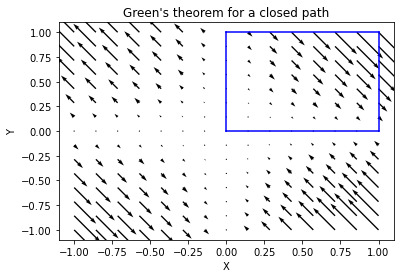

In [25]:
s = np.linspace(-1, 1, 15)
x1, y1 = np.meshgrid(s, s)
fig, ax = plt.subplots()
ax.quiver(x1, y1, x1*y1, -x1*y1)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_title('')
ax.plot(np.zeros(10), np.linspace(0, 1, 10), 'b')
ax.plot(np.linspace(0, 1, 10), np.zeros(10), 'b')
ax.plot(np.linspace(0, 1, 10), np.ones(10), 'b')
ax.plot(np.ones(10), np.linspace(0, 1, 10), 'b')
ax.set_title("Green's theorem for a closed path");plt.show()

### Example 3
$$\vec{F} = ax^2 \hat{i} + by^2 \hat{j}$$
For square surface:  $$0\le x \ge \pi/2$$
 $$0\le y \ge \pi/2$$

In [26]:
F = sp.sin(C.x)*sp.cos(C.y)*C.i + sp.cos(C.x)*sp.sin(C.y)*C.j
F

(sin(.x)*cos(.y))*.i + (sin(.y)*cos(.x))*.j

In [27]:
div_F = divergence(F)
div_F

2*cos(.x)*cos(.y)

In [28]:
curl_F = curl(F)
curl_F

0

In [29]:
div_lin_int = sp.Integral(sp.Integral(2*sp.cos(x)*sp.cos(y), (x, 0, sp.pi/2)), (y, 0, sp.pi/2) )
div_lin_int

Integral(2*cos(x)*cos(y), (x, 0, pi/2), (y, 0, pi/2))

In [30]:
div_lin_int.doit()

2

#### Graphical presentation

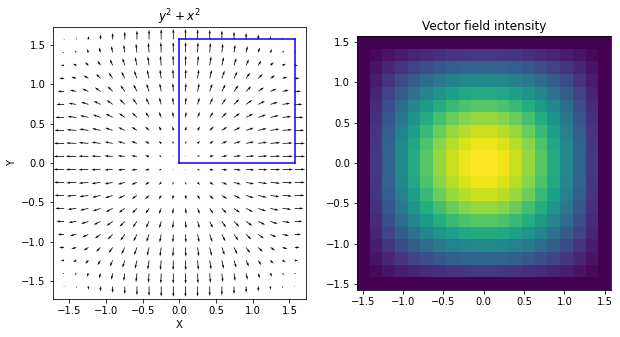

In [31]:
s = np.linspace(-np.pi/2, np.pi/2, 20)
x1, y1 = np.meshgrid(s, s)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5); fig.set_figwidth(10)
ax1.quiver(x1, y1, np.sin(x1)*np.cos(y1), np.cos(x1)*np.sin(y1))
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_title('$y^2 + x^2$')
ax1.plot(np.zeros(10), np.linspace(0, np.pi/2, 10),'b')
ax1.plot(np.linspace(0, np.pi/2, 10), np.zeros(10), 'b')
ax1.plot(np.linspace(0, np.pi/2, 10), np.pi/2*np.ones(10), 'b')
ax1.plot(np.pi/2*np.ones(10), np.linspace(0, np.pi/2, 10), 'b')
ax2.imshow(2*np.cos(x1)*np.cos(y1), origin = 'lower', extent = [x1.min(), x1.max(), y1.min(), y1.max()])
ax2.set_title('Vector field intensity'); plt.show()

### Example 4
$$\vec{F} = y\hat{i} - x\hat{j}$$
Surface is circle of radius one i.e.,
$$0\le x \ge 1$$
$$ -\sqrt{1-x^2}\le y \ge \sqrt{1-x^2}$$

In [32]:
F = C.y*C.i - C.x*C.j
F

.y*.i + (-.x)*.j

In [33]:
div_F = divergence(F) 
div_F

0

In [34]:
curl_F = curl(F)
curl_F

(-2)*.k

In [35]:
lin_int_div = sp.Integral(sp.Integral(2, (y, -sp.sqrt(1-x**2), sp.sqrt(1-x**2))), (x, -1, 1)).doit()
lin_int_div

2*pi

#### Graphical representation

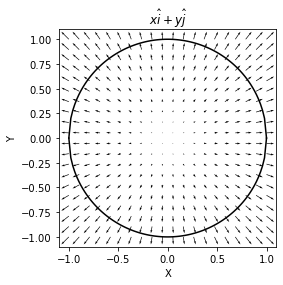

In [36]:
s = np.linspace(-1, 1, 20)
x1, y1 = np.meshgrid(s, s)
fig, ax = plt.subplots()
ax.quiver(x1, y1, x1, y1)
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_title('$x\hat{i} + y\hat{j}$')
ax.plot(np.linspace(-1, 1, 100), np.sqrt(1 - (np.linspace(-1, 1, 100)**2)), 'k')
ax.plot(np.linspace(-1, 1, 100), -np.sqrt(1 - (np.linspace(-1, 1, 100)**2)), 'k')
ax.set_aspect('equal'); plt.show()

### <center> The End